### Evaluating and visualizing NAAF-adjusted taxonomic peptide composition Trocas 7 incubations

#### Beginning with: phylum-level LCA assigments adjusted by NAAF factor in csv, manually created from LCA NAAF csvs

#### Goal: heatmaps and stacked bar plot peptide contributions for each station at both timepoints

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

In [75]:
# rearranged and condensed the csv manually in Libre Calc
# all peptide counts adjusted by NAAF numerators and sample denominator
# read in new csv:

MN = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/lca/NAAF/MN_phylum_naaf_sorted.csv", index_col=0)
MS = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/lca/NAAF/MS_phylum_naaf_sorted.csv", index_col=0)
BY = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/lca/NAAF/BY_phylum_naaf_sorted.csv", index_col=0)
CV = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/lca/NAAF/CV_phylum_naaf_sorted.csv", index_col=0)

MN_T = MN.transpose()
MS_T = MS.transpose()
BY_T = BY.transpose()
CV_T = CV.transpose()

Phylum,Proteobacteria,Actinobacteria,Planctomycetes,Firmicutes,Verrucomicrobia,Acidobacteria,Aquificae,Bacteroidetes,Chloroflexi,Fusobacteria,...,Ascomycota,Oomycota,Mucoromycota,Apicomplexa,Tubulinea,Parabasalia,Evosea,Haptista,Uroviricota,Negarnaviricota
Time 0 small,17.459511,82.210317,0.191484,0.012513,0.000000,0.0,0.000000,0.087379,0.004171,0.004171,...,0.000674,0.0,0.0,0.0,0.0,0.00000,0.004171,0.0,0.0,0.0
Time 0 large,25.428598,73.630348,0.479921,0.000000,0.000000,0.0,0.013144,0.009550,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
Time 24 small,16.952428,83.010647,0.000000,0.013654,0.000000,0.0,0.001000,0.008218,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
Time 24 large,18.341978,81.412453,0.000000,0.012660,0.021243,0.0,0.031382,0.012995,0.000000,0.000000,...,0.010621,0.0,0.0,0.0,0.0,0.12971,0.000000,0.0,0.0,0.0


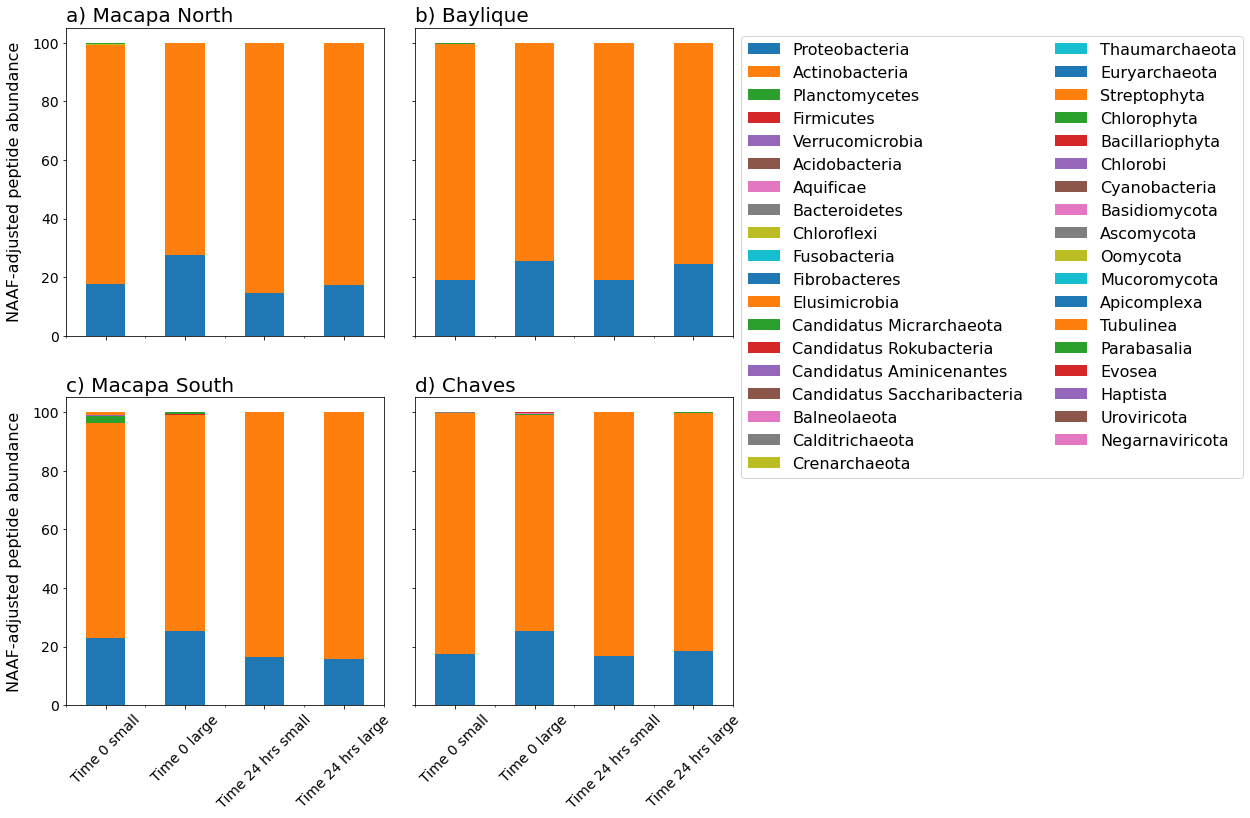

In [74]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 0 large', 'Time 24 hrs small', 'Time 24 hrs large']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True)
axes[0,0].set_title('a) Macapa North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)


#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True)
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True)
axes[1,0].set_title('c) Macapa South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)

#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True)
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 16, ncol = 2)

### Make plots of just the major players: Proteo, Actin, Plancto

In [84]:
# made dfs for each station that are just these top three phyla

MN_maj = MN_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes']].copy()
MS_maj = MS_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes']].copy()
BY_maj = BY_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes']].copy()
CV_maj = CV_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes']].copy()

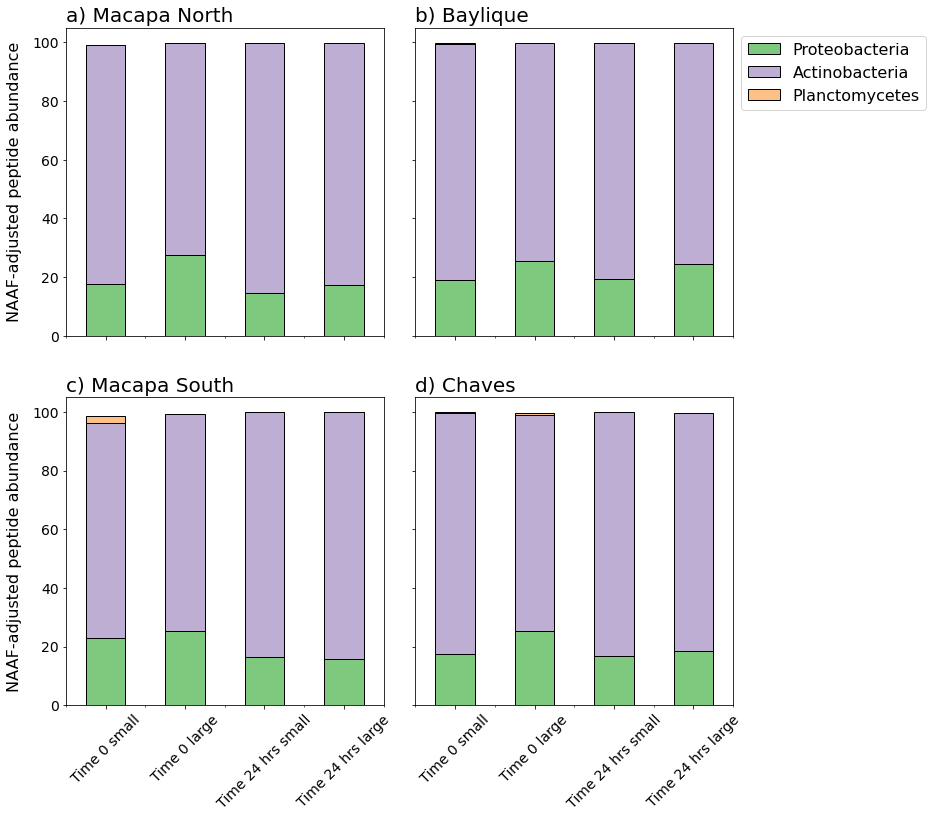

In [93]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 0 large', 'Time 24 hrs small', 'Time 24 hrs large']

colors = ['#7fc97f', '#beaed4', '#fdc086']

#  Macapa North
MN_maj.plot(ax = axes[0,0], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[0,0].set_title('a) Macapa North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)


#  Baylique
BY_maj.plot(ax = axes[0,1], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_maj.plot(ax = axes[1,0], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[1,0].set_title('c) Macapa South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)

#  Chaves
CV_maj.plot(ax = axes[1,1], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 16, ncol = 1)

## Make plots of just the minor players: all phyla except Proteobacteria and Actinobacteria

In [100]:
# made dfs for each station that are copies of the original trandposed 

MN_min = MN_T.copy()
MS_min = MS_T.copy()
BY_min = BY_T.copy()
CV_min = CV_T.copy()

del MN_min['Proteobacteria']
del MN_min['Actinobacteria']
del MN_min['Planctomycetes']

del MS_min['Proteobacteria']
del MS_min['Actinobacteria']
del MS_min['Planctomycetes']

del BY_min['Proteobacteria']
del BY_min['Actinobacteria']
del BY_min['Planctomycetes']

del CV_min['Proteobacteria']
del CV_min['Actinobacteria']
del CV_min['Planctomycetes']

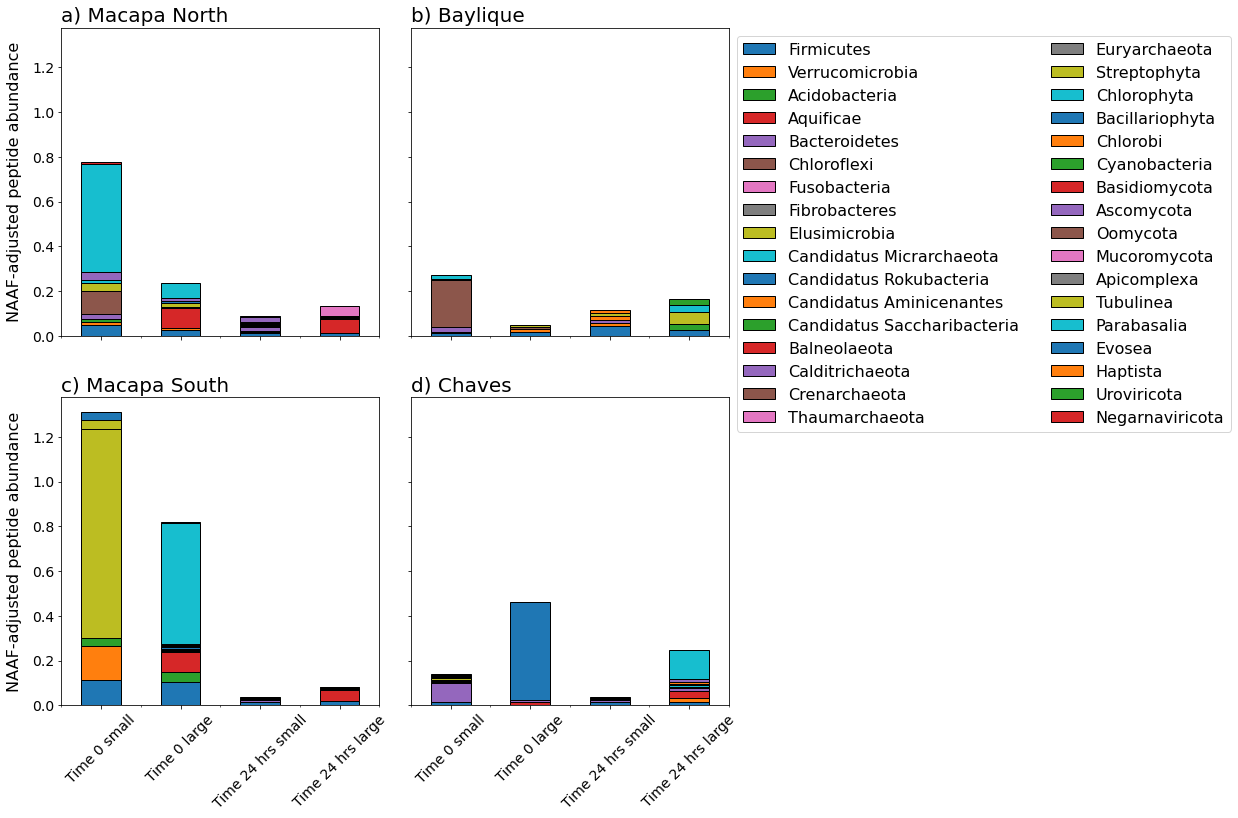

In [101]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 0 large', 'Time 24 hrs small', 'Time 24 hrs large']

colors = ['#7fc97f', '#beaed4', '#fdc086']

#  Macapa North
MN_min.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapa North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)

#  Baylique
BY_min.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_min.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapa South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)

#  Chaves
CV_min.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 16, ncol = 2)